In [139]:
# ================================
# Importações e Configuração de Logs
# ================================

# Importação de bibliotecas necessárias para manipulação de dados, visualização, modelagem e logs
import pandas as pd  # Para manipulação de dados
import numpy as np  # Para operações numéricas
import matplotlib.pyplot as plt  # Para visualização de dados
import seaborn as sns  # Para gráficos mais avançados
import logging  # Para registrar logs do processo

# Importação de ferramentas de machine learning e manipulação de dados
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV  # Para divisão de dados e validação cruzada
from sklearn.preprocessing import StandardScaler, label_binarize  # Para normalização e binarização de rótulos
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Modelos de ensemble
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, matthews_corrcoef, roc_curve, auc  # Métricas de avaliação
from imblearn.combine import SMOTETomek  # Para balanceamento de classes
from xgboost import XGBClassifier  # Modelo XGBoost
from lightgbm import LGBMClassifier  # Modelo LightGBM
from sklearn.neural_network import MLPClassifier  # Modelo MLP (Multilayer Perceptron)
from sklearn.impute import KNNImputer  # Preenchimento de valores ausentes
import joblib  # Para salvar e carregar modelos

In [140]:
# Configuração de logs para registrar o progresso do pipeline
logging.basicConfig(
    filename='pipeline_log.log',  # Nome do arquivo de log
    level=logging.INFO,  # Nível de registro (INFO)
    format='%(asctime)s - %(levelname)s - %(message)s'  # Formato do log
)
logging.info("Pipeline iniciado.")  # Mensagem inicial no log

In [141]:
# ================================
# Carregamento e Cópia dos Dados
# ================================

# Carregamento dos conjuntos de dados
logging.info("Carregando dados...")
train = pd.read_csv('bootcamp_train.csv')  # Conjunto de treinamento
test = pd.read_csv('bootcamp_test.csv')  # Conjunto de teste

# Criação de cópias para preservar os dados originais
train_clean = train.copy()
test_clean = test.copy()

In [142]:
train.head()  # Exibição das primeiras linhas do conjunto de treinamento

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,False,0,False,False,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,False,False,False,True,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,False,False,True,False,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,False,False,True,False,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,False,True,False,False,Não,False,Não


In [143]:
train.isnull().sum()  # Contagem de valores ausentes em cada coluna do conjunto de treinamento

,0
id,0
x_minimo,0
x_maximo,56
y_minimo,0
y_maximo,0
peso_da_placa,0
area_pixels,0
perimetro_x,0
perimetro_y,0
soma_da_luminosidade,100


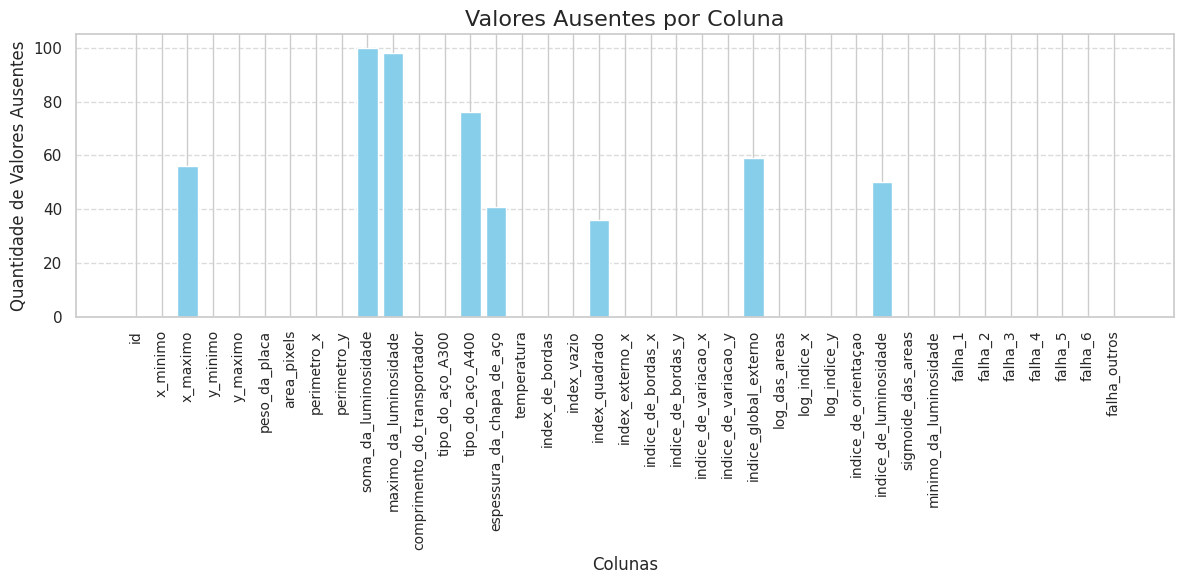

In [160]:
import matplotlib.pyplot as plt

# Dados fornecidos
missing_values = {
    'id': 0,
    'x_minimo': 0,
    'x_maximo': 56,
    'y_minimo': 0,
    'y_maximo': 0,
    'peso_da_placa': 0,
    'area_pixels': 0,
    'perimetro_x': 0,
    'perimetro_y': 0,
    'soma_da_luminosidade': 100,
    'maximo_da_luminosidade': 98,
    'comprimento_do_transportador': 0,
    'tipo_do_aço_A300': 0,
    'tipo_do_aço_A400': 76,
    'espessura_da_chapa_de_aço': 41,
    'temperatura': 0,
    'index_de_bordas': 0,
    'index_vazio': 0,
    'index_quadrado': 36,
    'index_externo_x': 0,
    'indice_de_bordas_x': 0,
    'indice_de_bordas_y': 0,
    'indice_de_variacao_x': 0,
    'indice_de_variacao_y': 0,
    'indice_global_externo': 59,
    'log_das_areas': 0,
    'log_indice_x': 0,
    'log_indice_y': 0,
    'indice_de_orientaçao': 0,
    'indice_de_luminosidade': 50,
    'sigmoide_das_areas': 0,
    'minimo_da_luminosidade': 0,
    'falha_1': 0,
    'falha_2': 0,
    'falha_3': 0,
    'falha_4': 0,
    'falha_5': 0,
    'falha_6': 0,
    'falha_outros': 0,
}

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.bar(missing_values.keys(), missing_values.values(), color='skyblue')

# Personalizar o gráfico
plt.title('Valores Ausentes por Coluna', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Quantidade de Valores Ausentes', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [144]:
print(train.describe())

                id      x_minimo    x_maximo      y_minimo      y_maximo  \
count  3390.000000   3390.000000  3334.00000  3.390000e+03  3.390000e+03   
mean   1694.500000    995.507375   605.90012  2.692640e+06  1.592301e+06   
std     978.753033   1796.737709   548.07724  5.625693e+06  1.821345e+06   
min       0.000000    -11.000000  -186.00000 -2.000000e+01 -1.660000e+02   
25%     847.250000     41.000000   179.00000  3.934352e+05  3.407380e+05   
50%    1694.500000    614.000000   544.00000  1.265462e+06  1.128297e+06   
75%    2541.750000   1187.500000  1090.00000  2.555025e+06  2.184335e+06   
max    3389.000000  15266.000000  1713.00000  1.041366e+08  1.291709e+07   

       peso_da_placa    area_pixels  perimetro_x   perimetro_y  \
count         3390.0    3390.000000  3390.000000   3390.000000   
mean           100.0    1566.317699    66.733923     47.261062   
std              0.0    4337.683975   195.092105    336.794632   
min            100.0    -206.000000  -229.000000   

In [145]:
print(train.duplicated().sum())

0


In [146]:
# ================================
# Tratamento de Valores Ausentes
# ================================

logging.info("Tratando valores ausentes...")

# Identificação de colunas numéricas e categóricas
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns  # Colunas numéricas
categorical_cols = train.select_dtypes(include=['object']).columns  # Colunas categóricas

# Criação do imputador KNN para preenchimento de valores ausentes em colunas numéricas
knn_imputer = KNNImputer()

# Imputação de valores ausentes para colunas numéricas
train[numerical_cols] = knn_imputer.fit_transform(train[numerical_cols])
test[numerical_cols] = knn_imputer.transform(test[numerical_cols])

# Imputação de valores ausentes para colunas categóricas usando a moda (valor mais frequente)
for col in categorical_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)
    if col in test.columns:
        test[col].fillna(train[col].mode()[0], inplace=True)

# Conversão de colunas booleanas para um formato consistente (True/False)
for col in ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6']:
    train[col] = train[col].astype(str).str.lower().isin(['true', 'sim', 'yes', '1'])
    if col in test.columns:
        test[col] = test[col].astype(str).str.lower().isin(['true', 'sim', 'yes', '1'])

<ipython-input-146-d9191133696f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
<ipython-input-146-d9191133696f>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [147]:
print(train.isnull().sum())

id                              0
x_minimo                        0
x_maximo                        0
y_minimo                        0
y_maximo                        0
peso_da_placa                   0
area_pixels                     0
perimetro_x                     0
perimetro_y                     0
soma_da_luminosidade            0
maximo_da_luminosidade          0
comprimento_do_transportador    0
tipo_do_aço_A300                0
tipo_do_aço_A400                0
espessura_da_chapa_de_aço       0
temperatura                     0
index_de_bordas                 0
index_vazio                     0
index_quadrado                  0
index_externo_x                 0
indice_de_bordas_x              0
indice_de_bordas_y              0
indice_de_variacao_x            0
indice_de_variacao_y            0
indice_global_externo           0
log_das_areas                   0
log_indice_x                    0
log_indice_y                    0
indice_de_orientaçao            0
indice_de_lumi

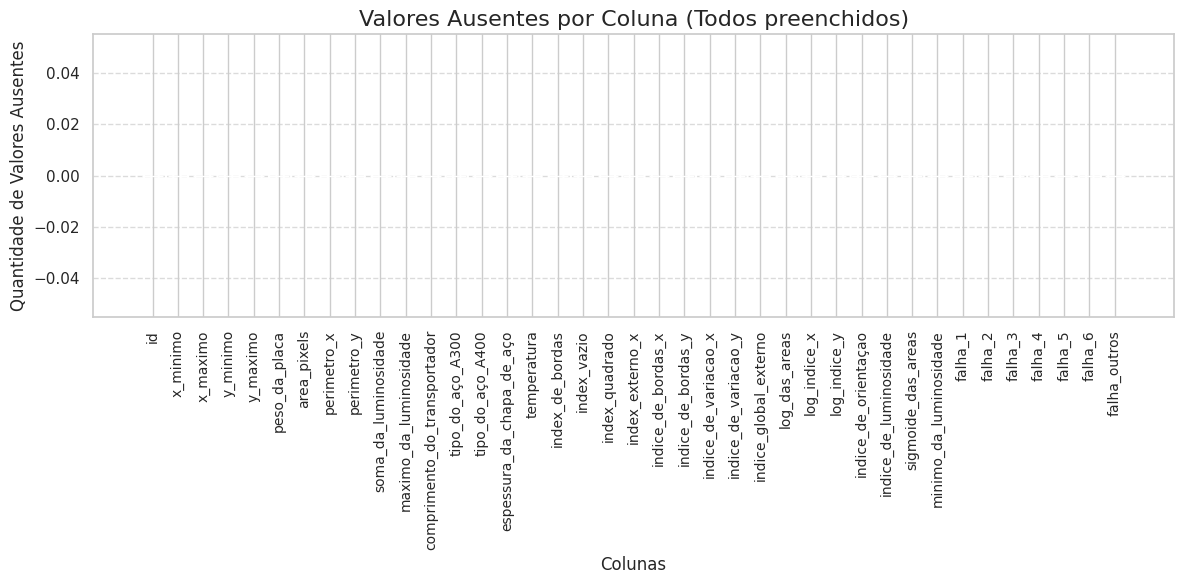

In [161]:
import matplotlib.pyplot as plt

# Dados fornecidos (0 valores ausentes em todas as colunas)
missing_values = {
    'id': 0,
    'x_minimo': 0,
    'x_maximo': 0,
    'y_minimo': 0,
    'y_maximo': 0,
    'peso_da_placa': 0,
    'area_pixels': 0,
    'perimetro_x': 0,
    'perimetro_y': 0,
    'soma_da_luminosidade': 0,
    'maximo_da_luminosidade': 0,
    'comprimento_do_transportador': 0,
    'tipo_do_aço_A300': 0,
    'tipo_do_aço_A400': 0,
    'espessura_da_chapa_de_aço': 0,
    'temperatura': 0,
    'index_de_bordas': 0,
    'index_vazio': 0,
    'index_quadrado': 0,
    'index_externo_x': 0,
    'indice_de_bordas_x': 0,
    'indice_de_bordas_y': 0,
    'indice_de_variacao_x': 0,
    'indice_de_variacao_y': 0,
    'indice_global_externo': 0,
    'log_das_areas': 0,
    'log_indice_x': 0,
    'log_indice_y': 0,
    'indice_de_orientaçao': 0,
    'indice_de_luminosidade': 0,
    'sigmoide_das_areas': 0,
    'minimo_da_luminosidade': 0,
    'falha_1': 0,
    'falha_2': 0,
    'falha_3': 0,
    'falha_4': 0,
    'falha_5': 0,
    'falha_6': 0,
    'falha_outros': 0,
}

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.bar(missing_values.keys(), missing_values.values(), color='lightgreen')

# Personalizar o gráfico
plt.title('Valores Ausentes por Coluna (Todos preenchidos)', fontsize=16)
plt.xlabel('Colunas', fontsize=12)
plt.ylabel('Quantidade de Valores Ausentes', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [148]:
print(train.describe())

                id      x_minimo     x_maximo      y_minimo      y_maximo  \
count  3390.000000   3390.000000  3390.000000  3.390000e+03  3.390000e+03   
mean   1694.500000    995.507375   605.809204  2.692640e+06  1.592301e+06   
std     978.753033   1796.737709   544.808646  5.625693e+06  1.821345e+06   
min       0.000000    -11.000000  -186.000000 -2.000000e+01 -1.660000e+02   
25%     847.250000     41.000000   181.000000  3.934352e+05  3.407380e+05   
50%    1694.500000    614.000000   544.500000  1.265462e+06  1.128297e+06   
75%    2541.750000   1187.500000  1088.000000  2.555025e+06  2.184335e+06   
max    3389.000000  15266.000000  1713.000000  1.041366e+08  1.291709e+07   

       peso_da_placa    area_pixels  perimetro_x   perimetro_y  \
count         3390.0    3390.000000  3390.000000   3390.000000   
mean           100.0    1566.317699    66.733923     47.261062   
std              0.0    4337.683975   195.092105    336.794632   
min            100.0    -206.000000  -229.

In [149]:
# Identificar colunas numéricas que contêm valores negativos
negative_values = train.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x < 0).any())
print("Colunas com valores negativos:", negative_values[negative_values].index)

Colunas com valores negativos: Index(['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels',
       'perimetro_x', 'perimetro_y', 'comprimento_do_transportador',
       'espessura_da_chapa_de_aço', 'indice_de_variacao_x',
       'indice_de_variacao_y', 'indice_de_orientaçao',
       'indice_de_luminosidade'],
      dtype='object')


In [150]:
from sklearn.preprocessing import MinMaxScaler

def tratar_valores_negativos_e_normalizar(train, test):

    # Substituir valores negativos por 0 ou estatísticas para variáveis que não devem ser negativas
    columns_positive_only = [
        'area_pixels', 'perimetro_x', 'perimetro_y',
        'comprimento_do_transportador', 'espessura_da_chapa_de_aço'
    ]

    for col in columns_positive_only:
        if col in train.columns:  # Verificar se a coluna existe no DataFrame de treinamento
            # Substituir valores negativos pela mediana dos valores válidos
            median_value = train[col][train[col] >= 0].median()
            train[col] = train[col].apply(lambda x: x if x >= 0 else median_value)
        if col in test.columns:  # Verificar se a coluna existe no DataFrame de teste
            # Usar a mediana calculada no conjunto de treinamento para imputar valores no teste
            test[col] = test[col].apply(lambda x: x if x >= 0 else median_value)

    # Normalizar variáveis que podem assumir valores negativos
    columns_to_normalize = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo',
                            'indice_de_variacao_x', 'indice_de_variacao_y',
                            'indice_de_orientação', 'indice_de_luminosidade']

    # Filtrar colunas existentes no DataFrame para evitar erros
    columns_to_normalize_existing = [col for col in columns_to_normalize if col in train.columns and col in test.columns]

    if columns_to_normalize_existing:
        scaler = MinMaxScaler()  # Normalizar para intervalo [0, 1]
        train[columns_to_normalize_existing] = scaler.fit_transform(train[columns_to_normalize_existing])
        test[columns_to_normalize_existing] = scaler.transform(test[columns_to_normalize_existing])
    else:
        print("Nenhuma coluna para normalização encontrada em ambos os DataFrames.")

In [151]:
tratar_valores_negativos_e_normalizar(train, test)

In [152]:
print(train.isnull().sum())  # Deve retornar 0 para todas as colunas
print(test.isnull().sum())  # Deve retornar 0 para todas as colunas

id                              0
x_minimo                        0
x_maximo                        0
y_minimo                        0
y_maximo                        0
peso_da_placa                   0
area_pixels                     0
perimetro_x                     0
perimetro_y                     0
soma_da_luminosidade            0
maximo_da_luminosidade          0
comprimento_do_transportador    0
tipo_do_aço_A300                0
tipo_do_aço_A400                0
espessura_da_chapa_de_aço       0
temperatura                     0
index_de_bordas                 0
index_vazio                     0
index_quadrado                  0
index_externo_x                 0
indice_de_bordas_x              0
indice_de_bordas_y              0
indice_de_variacao_x            0
indice_de_variacao_y            0
indice_global_externo           0
log_das_areas                   0
log_indice_x                    0
log_indice_y                    0
indice_de_orientaçao            0
indice_de_lumi

In [153]:
# ================================
# Criação da Variável Alvo
# ================================

logging.info("Criando variável alvo...")

# Função para combinar múltiplas colunas de falhas em uma única variável categórica
def identificar_classe_falha(row):
    if row['falha_1']: return 'falha_1'
    elif row['falha_2']: return 'falha_2'
    elif row['falha_3']: return 'falha_3'
    elif row['falha_4']: return 'falha_4'
    elif row['falha_5']: return 'falha_5'
    elif row['falha_6']: return 'falha_6'
    else: return 'falha_outros'

# Aplicação da função ao conjunto de treinamento
train['classe_defeito'] = train.apply(identificar_classe_falha, axis=1)

# Aplicação ao conjunto de teste (se as colunas necessárias existirem)
if all(col in test.columns for col in ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6']):
    test['classe_defeito'] = test.apply(identificar_classe_falha, axis=1)

# Mapeamento das classes para valores numéricos
class_mapping = {label: idx for idx, label in enumerate(train['classe_defeito'].unique())}
inverse_class_mapping = {idx: label for label, idx in class_mapping.items()}

# Conversão da variável alvo para formato numérico
train['classe_defeito'] = train['classe_defeito'].map(class_mapping)

# Conversão no conjunto de teste (se a variável existir)
if 'classe_defeito' in test.columns:
    test['classe_defeito'] = test['classe_defeito'].map(class_mapping)



<ipython-input-162-0c41de91193d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


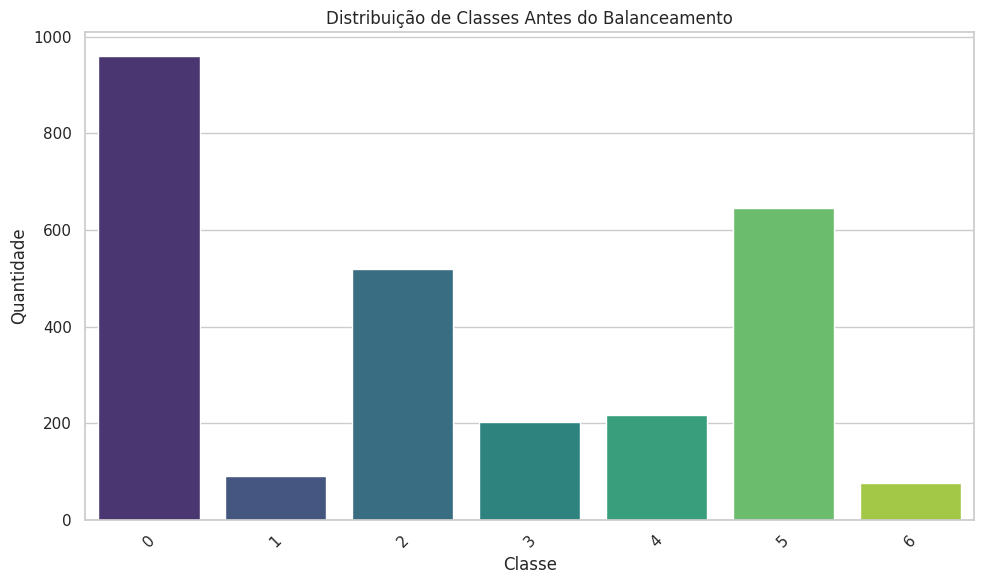

In [162]:
# Visualizar a distribuição das classes antes do balanceamento
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title("Distribuição de Classes Antes do Balanceamento")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [155]:
# ================================
# Feature Engineering
# ================================

logging.info("Criando novas features...")

# Adição de uma nova feature que soma os valores numéricos
train['soma_features'] = train[numerical_cols].sum(axis=1)
test['soma_features'] = test[numerical_cols].sum(axis=1)

# ================================
# Preparação dos Dados
# ================================

logging.info("Preparando dados para treinamento...")

# Separação das features e do alvo
X = train.drop(columns=['classe_defeito', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6'], errors='ignore')
y = train['classe_defeito']

# Transformação de variáveis categóricas para variáveis dummy
X = pd.get_dummies(X, drop_first=True)
X_test_final = pd.get_dummies(test.drop(columns=['classe_defeito', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6'], errors='ignore'),
                               drop_first=True)

# Garantir que as colunas de treino e teste sejam consistentes
missing_cols = set(X.columns) - set(X_test_final.columns)
for col in missing_cols:
    X_test_final[col] = 0
X_test_final = X_test_final[X.columns]

# Divisão dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Normalização dos dados para escalas consistentes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# Aplicação do SMOTE-Tomek para balanceamento das classes
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_-train_scaled, y_train)

<ipython-input-156-4998535b0877>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


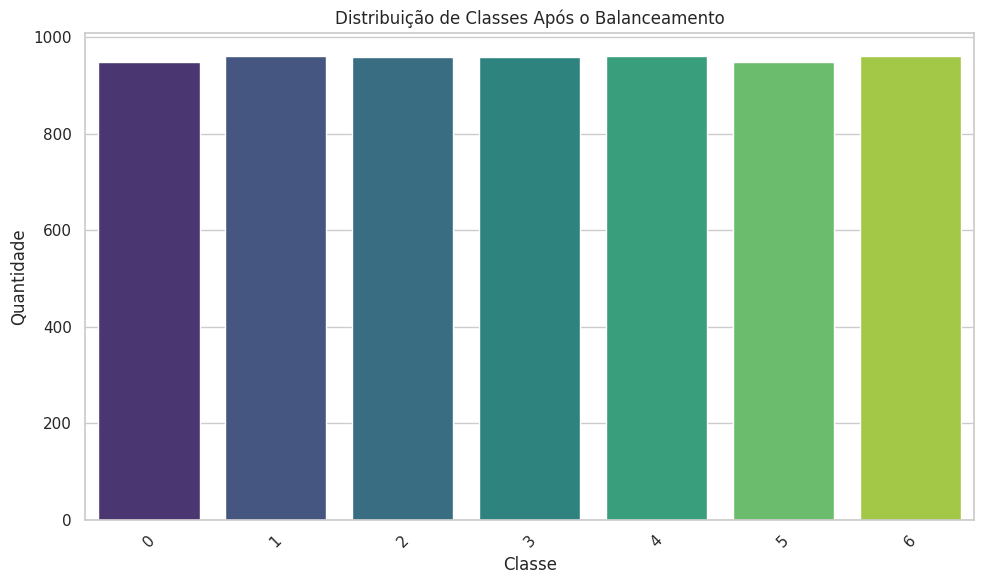

In [156]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled, palette='viridis')
plt.title("Distribuição de Classes Após o Balanceamento")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8597
[LightGBM] [Info] Number of data points in the train set: 6701, number of used features: 45
[LightGBM] [Info] Start training from score -1.954603
[LightGBM] [Info] Start training from score -1.942038
[LightGBM] [Info] Start training from score -1.943079
[LightGBM] [Info] Start training from score -1.943079
[LightGBM] [Info] Start training from score -1.942038
[LightGBM] [Info] Start training from score -1.954603
[LightGBM] [Info] Start training from score -1.942038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Avaliação do Modelo: Random Forest ===
              precision    recall  f1-score   support

falha_outros       1.00      0.98      0.99       240
     falha_4       0.84      0.91      0.88        23
     falha_3       0.98      0.95      0.97       130
     falha_2       0.85      0.88      0.87        51
     falha_1       0.54      0.57      0.56        54
     falha_6       0.79      0.78      0.79       161
     falha_5       0.57      0.63      0.60        19

    accuracy                           0.88       678
   macro avg       0.80      0.82      0.81       678
weighted avg       0.88      0.88      0.88       678


=== Avaliação do Modelo: Regressão Logística ===
              precision    recall  f1-score   support

falha_outros       1.00      0.98      0.99       240
     falha_4       0.77      0.87      0.82        23
     falha_3       0.97      0.95      0.96       130
     falha_2       0.73      0.92      0.82        51
     falha_1       0.56      0.63     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

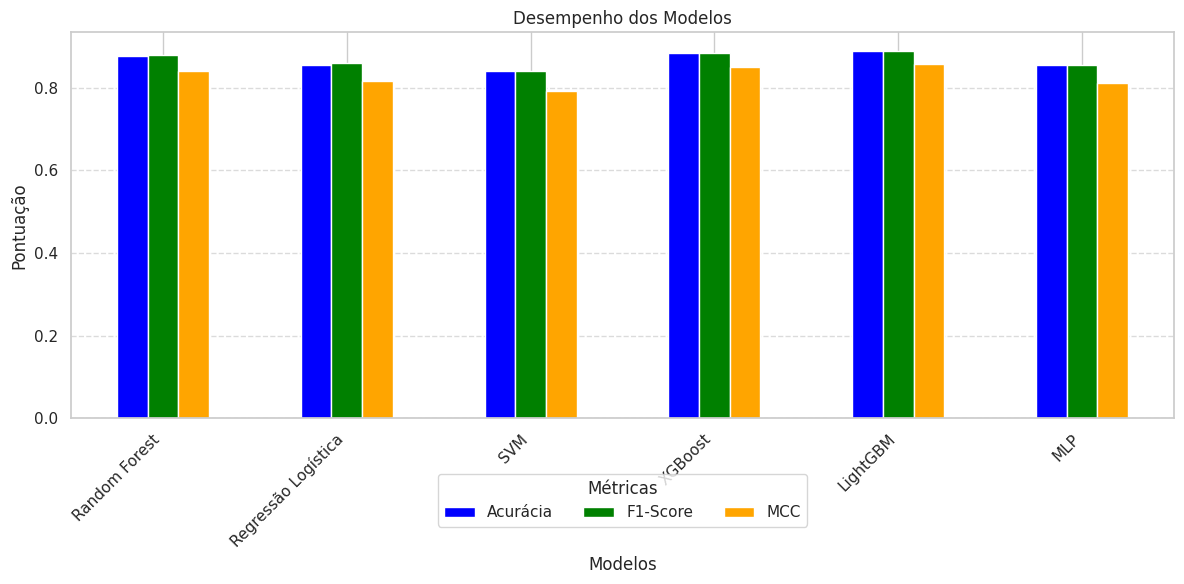

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [157]:
# ================================
# Treinamento e Avaliação de Modelos
# ================================

# Função para treinar modelos e ajustar hiperparâmetros
def treinar_modelo(modelo, params, nome):
    logging.info(f"Tunando hiperparâmetros para {nome}...")
    grid = GridSearchCV(modelo, params, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
    grid.fit(X_resampled, y_resampled)
    logging.info(f"Melhores parâmetros para {nome}: {grid.best_params_}")
    return grid.best_estimator_

# Configuração dos modelos e seus respectivos hiperparâmetros
modelos = {
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [100, 200], 'max_depth': [10, 20]}),
    'Regressão Logística': (LogisticRegression(max_iter=1000, class_weight='balanced'), {'C': [0.1, 1, 10]}),
    'SVM': (SVC(probability=True, class_weight='balanced'), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss', random_state=42),
                {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]}),
    'LightGBM': (LGBMClassifier(random_state=42),
                 {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]}),
    'MLP': (MLPClassifier(random_state=42), {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]})
}

# Treinamento de todos os modelos
melhores_modelos = {}
for nome, (modelo, params) in modelos.items():
    melhores_modelos[nome] = treinar_modelo(modelo, params, nome)

# Função para avaliar os modelos
def avaliar_modelo(modelo, X_val, y_val, nome_modelo, inverse_class_mapping):
    y_val_pred = modelo.predict(X_val)
    relatorio = classification_report(y_val, y_val_pred, target_names=inverse_class_mapping.values())
    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    mcc = matthews_corrcoef(y_val, y_val_pred)
    print(f"\n=== Avaliação do Modelo: {nome_modelo} ===")
    print(relatorio)
    return acc, f1, mcc

# Avaliação de cada modelo e armazenamento das métricas
metricas_modelos = {}
for nome, modelo in melhores_modelos.items():
    acc, f1, mcc = avaliar_modelo(modelo, X_val_scaled, y_val, nome, inverse_class_mapping)
    metricas_modelos[nome] = {'Acurácia': acc, 'F1-Score': f1, 'MCC': mcc}

# Salvar métricas em um arquivo CSV
metricas_df = pd.DataFrame(metricas_modelos).T
metricas_df.to_csv("metricas_modelos.csv", index=True)
logging.info("Métricas salvas em 'metricas_modelos.csv'.")

# Gráfico de comparação das métricas entre os modelos
plt.figure(figsize=(12, 6))
metricas_df.plot(kind='bar', figsize=(12, 6), color=['blue', 'green', 'orange'])
plt.title("Desempenho dos Modelos")
plt.ylabel("Pontuação")
plt.xlabel("Modelos")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Métricas", loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identificação e salvamento do melhor modelo
melhor_modelo_nome = metricas_df['Acurácia'].idxmax()
melhor_modelo = melhores_modelos[melhor_modelo_nome]
joblib.dump(melhor_modelo, f"melhor_modelo_{melhor_modelo_nome}.pkl")
logging.info(f"Melhor modelo ({melhor_modelo_nome}) salvo em 'melhor_modelo_{melhor_modelo_nome}.pkl'.")

# Previsões no conjunto de teste com o melhor modelo
y_test_pred = melhor_modelo.predict(X_test_scaled)
test['classe_predita'] = y_test_pred
test['classe_predita'] = test['classe_predita'].map(inverse_class_mapping)
test.to_csv('bootcamp_test_predictions.csv', index=False)
logging.info("Previsões no conjunto de teste salvas em 'bootcamp_test_predictions.csv'.")

In [166]:
# ================================
# Previsões e Probabilidades
# ================================

logging.info("Previsões e probabilidades no conjunto de validação e teste.")

# Função para exibir as probabilidades associadas às classes
def exibir_probabilidades(modelo, X, y, inverse_class_mapping, conjunto):
    # Previsões e probabilidades
    probabilidades = modelo.predict_proba(X)
    y_pred = modelo.predict(X)

    # Exibir probabilidades para as primeiras 5 amostras
    print(f"\n=== Probabilidades no conjunto {conjunto} ===")
    for i, prob in enumerate(probabilidades[:5]):  # Exibir as 5 primeiras amostras
        print(f"Amostra {i+1}: Classe predita: {inverse_class_mapping[y_pred[i]]}, Probabilidades: {prob}")

    # Avaliação do modelo
    print(f"\n=== Avaliação no conjunto {conjunto} ===")
    relatorio = classification_report(y, y_pred, target_names=inverse_class_mapping.values())
    print(relatorio)

# Exibir probabilidades no conjunto de validação
exibir_probabilidades(melhor_modelo, X_val_scaled, y_val, inverse_class_mapping, "validação")

# Previsões e probabilidades no conjunto de teste
test_probabilidades = melhor_modelo.predict_proba(X_test_scaled)
test['classe_predita'] = melhor_modelo.predict(X_test_scaled)
test['classe_predita'] = test['classe_predita'].map(inverse_class_mapping)

# Adicionar as probabilidades ao conjunto de teste
prob_cols = [f"prob_{classe}" for classe in inverse_class_mapping.values()]
for i, col in enumerate(prob_cols):
    test[col] = test_probabilidades[:, i]

# Salvar as previsões e probabilidades no conjunto de teste
test.to_csv('bootcamp_test_predictions_with_probabilities.csv', index=False)
logging.info("Previsões e probabilidades no conjunto de teste salvas em 'bootcamp_test_predictions_with_probabilities.csv'.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== Probabilidades no conjunto validação ===
Amostra 1: Classe predita: falha_outros, Probabilidades: [9.99995713e-01 5.20675952e-13 1.74374311e-12 3.21681460e-13
 5.23470191e-09 4.28203857e-06 1.76438054e-12]
Amostra 2: Classe predita: falha_outros, Probabilidades: [9.99999700e-01 5.03670045e-13 2.95486805e-12 2.61499717e-11
 3.26005207e-08 2.73440918e-10 2.67300287e-07]
Amostra 3: Classe predita: falha_3, Probabilidades: [6.28324080e-10 2.14413237e-10 9.99999386e-01 1.77643637e-09
 7.70830111e-09 6.00433943e-07 3.40292117e-09]
Amostra 4: Classe predita: falha_6, Probabilidades: [3.97257883e-06 3.55416745e-07 1.81829791e-06 5.11691553e-05
 3.77053966e-04 9.99329939e-01 2.35691355e-04]
Amostra 5: Classe predita: falha_outros, Probabilidades: [9.99999981e-01 1.18337152e-12 5.12728757e-12 1.22212916e-10
 2.94722459e-10 1.89594706e-08 2.68022301e-11]

=== Avaliação no conjunto validação ===
              precision    recall  f1-score   support

falha_outros       1.00      0.98      0.99

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


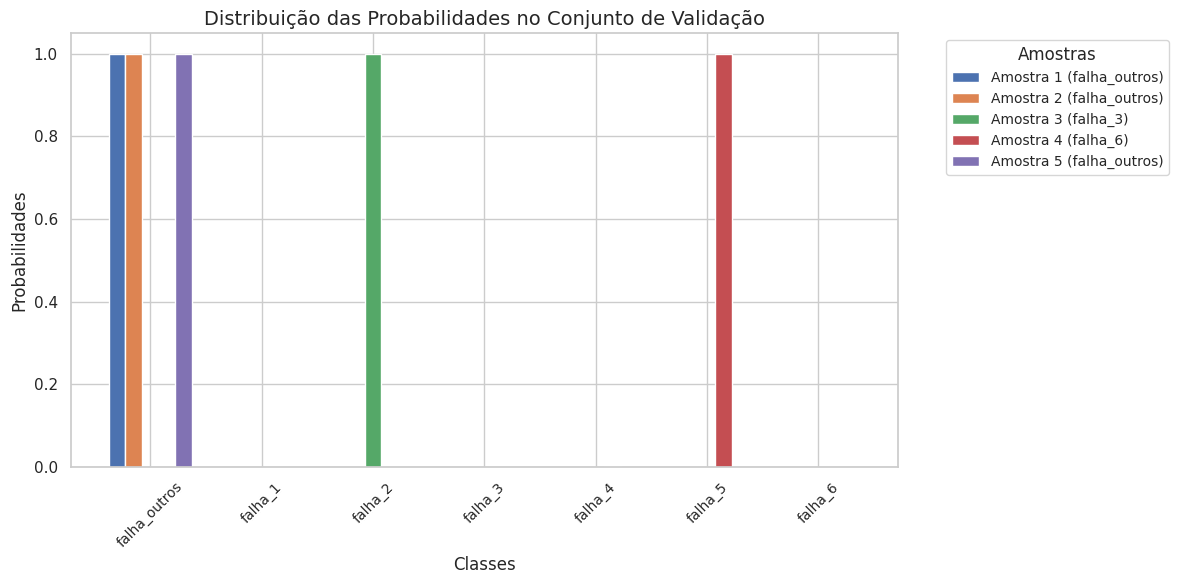

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Dados fornecidos
classes = ['falha_outros', 'falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6']
amostras = [
    [9.99995713e-01, 5.20675952e-13, 1.74374311e-12, 3.21681460e-13, 5.23470191e-09, 4.28203857e-06, 1.76438054e-12],
    [9.99999700e-01, 5.03670045e-13, 2.95486805e-12, 2.61499717e-11, 3.26005207e-08, 2.73440918e-10, 2.67300287e-07],
    [6.28324080e-10, 2.14413237e-10, 9.99999386e-01, 1.77643637e-09, 7.70830111e-09, 6.00433943e-07, 3.40292117e-09],
    [3.97257883e-06, 3.55416745e-07, 1.81829791e-06, 5.11691553e-05, 3.77053966e-04, 9.99329939e-01, 2.35691355e-04],
    [9.99999981e-01, 1.18337152e-12, 5.12728757e-12, 1.22212916e-10, 2.94722459e-10, 1.89594706e-08, 2.68022301e-11]
]
amostra_predita = ['falha_outros', 'falha_outros', 'falha_3', 'falha_6', 'falha_outros']

# Configuração do gráfico
x = np.arange(len(classes))  # Posições no eixo x para as classes
width = 0.15  # Largura de cada barra

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

for i, probs in enumerate(amostras):  # Iterar sobre as amostras
    ax.bar(x + i * width, probs, width, label=f'Amostra {i+1} ({amostra_predita[i]})')

# Configurações adicionais
ax.set_xlabel('Classes', fontsize=12)
ax.set_ylabel('Probabilidades', fontsize=12)
ax.set_title('Distribuição das Probabilidades no Conjunto de Validação', fontsize=14)
ax.set_xticks(x + (len(amostras) - 1) * width / 2)
ax.set_xticklabels(classes, rotation=45, fontsize=10)
ax.legend(title='Amostras', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Mostrar o gráfico
plt.show()